https://github.com/evan-magnusson/rdd/blob/master/tutorial/tutorial.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdd import rdd

In [3]:
np.random.seed(42)

In [4]:
N = 10000
x = np.random.normal(1, 1, N)
epsilon = np.random.normal(0, 1, N)
threshold = 1
treatment = np.where(x >= threshold, 1, 0)
w1 = np.random.normal(0, 1, N)
w2 = np.random.normal(0, 4, N)
y = .5 * treatment + 2 * x - .2 * w1 + 1 + epsilon

data = pd.DataFrame({'y':y, 'x':x,'w1':w1,'w2':w2})
data.head()


,y,x,w1,w2
0,3.745276,1.496714,0.348286,-7.922288
1,2.361307,0.861736,0.283324,-4.219943
2,4.385300,1.647689,-0.936520,-2.348114
3,6.540561,2.523030,0.579584,0.598676
4,4.026888,0.765847,-1.490083,4.096649


In [5]:
bandwidth_opt = rdd.optimal_bandwidth(data['y'], data['x'], cut=threshold)
print("Optimal bandwidth:", bandwidth_opt)

Optimal bandwidth: 0.7448859965965795


In [6]:
data_rdd = rdd.truncated_data(data, 'x', bandwidth_opt, cut=threshold)

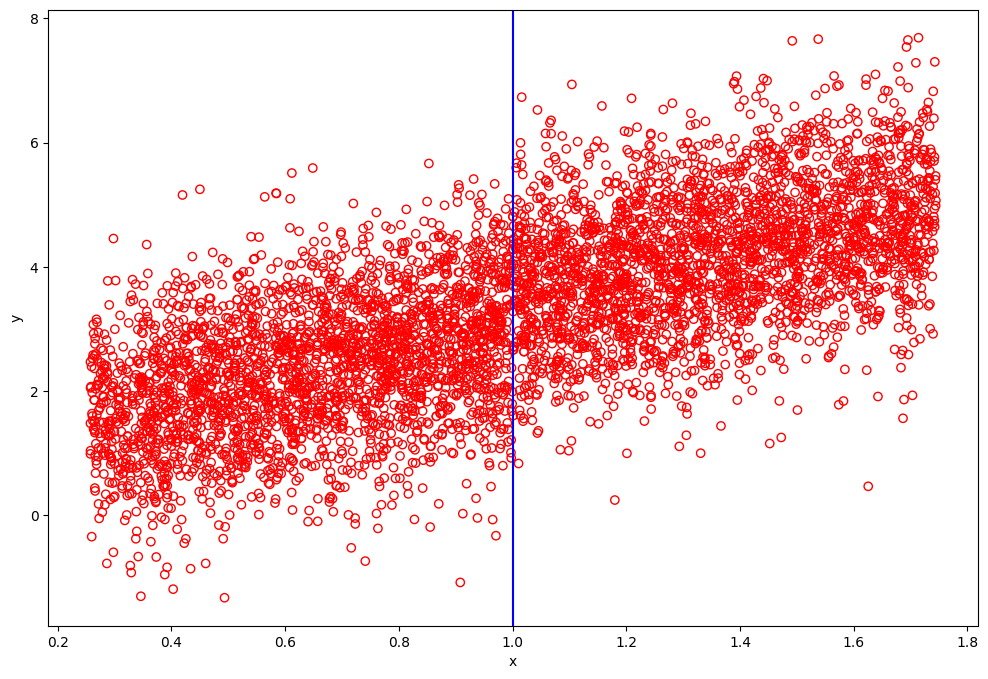

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(data_rdd['x'], data_rdd['y'], facecolors='none', edgecolor='r')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=threshold,color='b')
plt.show()
plt.close()

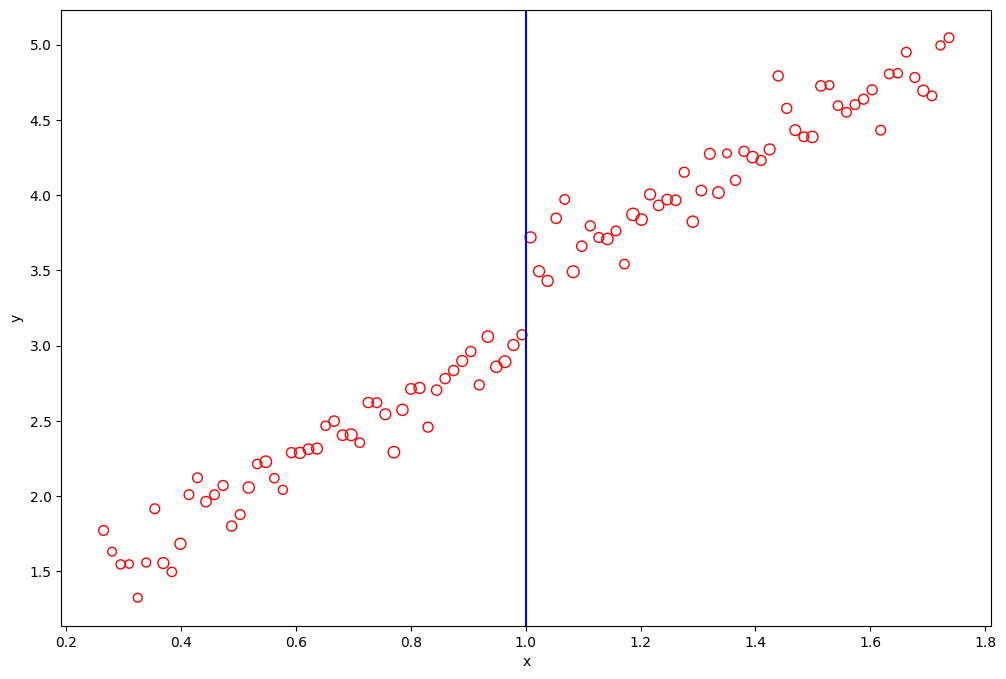

In [8]:
data_binned = rdd.bin_data(data_rdd, 'y', 'x', 100)
plt.figure(figsize=(12, 8))
plt.scatter(data_binned['x'], data_binned['y'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=threshold, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.close()

In [9]:
model = rdd.rdd(data_rdd, 'x', 'y', cut=threshold)
print(model.fit().summary())

Estimation Equation:	 y ~ TREATED + x
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            WLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2811.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:46:59   Log-Likelihood:                -7794.0
No. Observations:                5442   AIC:                         1.559e+04
Df Residuals:                    5439   BIC:                         1.561e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     

In [10]:
model = rdd.rdd(data_rdd, 'x', 'y', cut=threshold, controls=['w1', 'w2'])
print(model.fit(cov_type='hc1').summary())

Estimation Equation:	 y ~ TREATED + x + w1 + w2
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            WLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1520.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:46:59   Log-Likelihood:                -7709.9
No. Observations:                5442   AIC:                         1.543e+04
Df Residuals:                    5437   BIC:                         1.546e+04
Df Model:                           4                                         
Covariance Type:                  hc1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

In [11]:
model = rdd.rdd(data_rdd, 'x', cut=threshold, equation='y ~ TREATED + x + w1*w2')
print(model.fit().summary())

Estimation Equation:	 y ~ TREATED + x + w1*w2
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            WLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1194.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:46:59   Log-Likelihood:                -7709.6
No. Observations:                5442   AIC:                         1.543e+04
Df Residuals:                    5436   BIC:                         1.547e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [12]:
data_placebo = rdd.truncated_data(data, 'x', yname='y', cut=0)

In [14]:
model = rdd.rdd(data_placebo, 'x', 'y', cut=0, controls=['w1'])
print(model.fit().summary())

Estimation Equation:	 y ~ TREATED + x + w1
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.375
Model:                            WLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     660.8
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:48:08   Log-Likelihood:                -4633.4
No. Observations:                3310   AIC:                             9275.
Df Residuals:                    3306   BIC:                             9299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept